# Real Estate Data Science Project

Bearbeitet von: 2341463 und 1269263

### Inhaltsverzeichnis

## 1. Business Understanding (3 Punkte)

**Aufgabenstellung**: _Formulieren Sie ein Ziel oder mehrere
Ziele nach dem CRISP-DM Prozess, die für Immobilienspekulant*innen sinnvoll sind.
Bei Spekulationen werden typischerweise Immobilien erstanden, die wieder mit
Gewinn abgestoßen werden. Beginnen Sie mit der Idee „Wir brauchen mehr
Verständnis des Verkaufspreises (Z_Verkaufspreis)!“. Geben Sie Ihre Ziele in
Ihrem Jupyter-Notebook als Markup an (max. ½ Seite). Wichtig ist hier, eigene zu
untersuchende Hypothesen aufzustellen, die dann in Aufgabenteil 2 untersucht
werden. Nutzen Sie auch die vorhandenen Daten, um die Hypothesen zu ergänzen
oder anzupassen, wenn notwendig._


### Ziele der Immobilienspekulant*innen
Als Immobilienspekulant*innen bezeichnet man Personen, die eine Vielzahl von Immobilien erwerben und darauf hoffen, dass der Preis der Immobilien in Zukunft steigen wird. Die Häuser oder Wohnungen können dann mit Gewinn verkauft werden. Für die Kaufentscheidung und die einfache Bewertung der Attraktivität einer Immobilie, stehen für diese Personengruppe folgende Ziele und Anforderungen im Vordergrund:
1. Mehr Verständnis für den Verkaufspreis (Z_Verkaufspreis) schaffen
2. Auswirkungen der einzelnen Parameter auf den Verkaufspreis untersuchen
3. Identifikation von Attributen, die sich kaum oder gar nicht auf den Verkaufspreis auswirken
4. Klassifikation der Attraktivität der Angebote anhand des angebotenen Verkaufspreises in die drei Kategorien "gut", "neutral" und "schlecht"

### Ziele des Business Understanding (Geschäftsverständnis)
- Was sind die Ziele auf Geschäftsebene?
- Welche Anforderungen an das Ergebnis gibt es?
- Welche offenen Fragen sollen beantwortet werden?
- Wie könnten beispielhafte Antworten oder Ergebnisse aussehen?

Ein Haupziel auf dem Bereich der Geschäftsebene ist es, den Entscheidungsprozess für die Bewertung und den Kauf von Immobilien zu unterstützen. Durch die Anlyse der Daten sollen Vorhersagen zur Attraktivität der Angebote und die Auswirkungen der einzelnen Attribute (Parameter) auf den veranschlagten Preis bestimmt werden. Das Ergebnis sollte auch für nicht DataScience-kundige Anwender*innen verständlich und aussagekräftig gestaltet sein. Die zu beantortenden Fragen wurden als Ziele für die Untersuchung definiert (siehe vorherigen Abschnitt). Die Ergebnisse lassen sich in zwei Bereiche einteilen: 
* Für Angebote mit vorgegebenen (bekannten) Verkaufspreis soll eine automatische Klassifikation in die drei Gruppen "gutes Angebot", "neutral" und "schlechtes Angebot" erfolgen, damit die Immobilienspekulierenden eine vorab Einschätzung und eine damit verbundene Zeit- und Aufwandseinsparung erhalten. 
* Für Angebote mit unbekanntem Verkaufspreis soll anhand der Immobilien-Attribute eine Einschätzung und Vorhersage des Preises erfolgen.

## 2. Data Exploration und Analyse (9 Punkte)

**Aufgabenstellung**: _Laden und untersuchen Sie den
Datensatz in data_for_training.csv nach den Regeln wie in der Vorlesung
gelehrt. Nutzen Sie Mark-Up, um wichtige Erkenntnisse zu dokumentieren._

### Module und Datensätze importieren

In [326]:
# Import modules and packages
import os
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

# Import training and test data
df_train = pd.read_csv("data_for_training.csv", delimiter=";").drop(columns="A_Index")
df_test = pd.read_csv("data_for_test.csv", delimiter=";").drop(columns="A_Index")

# Output training dataframe
df_train

,AnzahlZimmer,Ausbaustufe,Baeder,BaederKG,Baujahr,EG_qm,Garage_qm,Garagen,Gesamteindruck,Keller_Typ_qm,Keller_qm,Kellerhoehe,Kellertyp,Lage,OG_qm,Umgebaut,Verkaufsjahr,Verkaufsmonat,Wohnflaeche_qm,Z_Verkaufspreis
0,3,1 Ebene,2,1,1992,125,49,2,3,88,116,Gut,Guter Wohnraum,Bezirk 19,0,1992,2021,6,125,187500
1,2,1 Ebene,2,1,2010,170,79,3,3,141,168,Gut,Guter Wohnraum,Bezirk 16,0,2010,2020,7,170,350000
2,2,1 Ebene,2,0,2015,119,40,2,3,0,119,Gut,Rohbau,Bezirk 18,0,2015,2018,3,119,171750
3,2,2 Ebenen,3,1,2015,64,40,2,3,48,64,Gut,Guter Wohnraum,Bezirk 18,73,2016,2020,10,138,154000
4,3,1 Ebene,2,0,2021,103,39,2,3,3,103,Gut,Guter Wohnraum,Bezirk 8,0,2021,2022,3,103,213899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,3,1 Ebene,2,1,1989,109,40,2,4,57,105,Durchschnitt,Mittlerer Wohnraum,Bezirk 14,0,1989,2022,5,109,218499
2338,3,1 Ebene,2,1,1969,153,41,2,3,14,96,Durchschnitt,Freizeitraum,Bezirk 22,0,2012,2018,1,153,155000
2339,3,2 Ebenen,3,0,1997,83,40,2,3,0,62,Gut,Rohbau,Bezirk 23,64,1997,2022,6,147,204699
2340,3,2 Ebenen,2,0,1984,46,21,1,3,21,46,Durchschnitt,Kein Wohnraum,Bezirk 13,46,1984,2019,5,92,85500


## 3. Data Preparation (3 Punkte)

**Aufgabenstellung**: _Bereinigen Sie die Daten und führen Sie Feature
Engineering durch. Hinweis: Kann bereits für Aufgabe 2 teilweise notwendig sein,
dann kenntlich machen und zusammenfassend aufführen._

### Fragestellungen der Data Preparation (Datenvorbereitung)
- Können die Daten in der vorliegenden Form verwendet werden?
- Wie können diese vorverarbeitet werden, um sie zu verwenden?

### Encoding kategorischer Daten
Im Bereich der Datenvorbereitung ist die Kodierung kategorischer Daten eine zentrale Aufgabe. Die meisten Daten im realen Leben bestehen bekannterweise aus kategorischen String-Werten. Für die computergestützte Verarbeitung benötigen die Modelle jedoch Fließkommazahlen oder ganze Zahlen.
- **Kategoriale Daten:** gesammelte Informationen, die in Gruppen eingeteilt sind
    - Nominalskala: Diese Art von kategorialen Daten besteht aus der Namensvariablen ohne numerische Werte.
    - Ordinalskala: Diese Art von kategorialen Daten besteht aus einer Reihe von Ordnungen oder Skalen.
- **Label Encoding:** Diese Art der Kodierung wird verwendet, wenn die Variablen in den Daten ordinal sind. Bei der ordinalen Kodierung wird jede Bezeichnung in ganzzahlige Werte umgewandelt, und die kodierten Daten stellen die Reihenfolge der Bezeichnungen dar.
- **One-Hot Encoding:** Bei der One-Hot-Codierung erhält jede Kategorie einer kategorialen Variable eine neue Variable. Dabei wird jede Kategorie mit Binärzahlen  abgebildet. Diese Art der Kodierung wird verwendet, wenn die Daten nominal sind. Neu erstellte binäre Merkmale können als Dummy-Variablen betrachtet werden. Nach einer Hot-Codierung hängt die Anzahl der Dummy-Variablen von der Anzahl der in den Daten vorhandenen Kategorien ab.

In [327]:
# Show all columns which need to be encoded
columns_object = df_train.dtypes[df_train.dtypes == "object"].index
print(columns_object, "\n----------")

# Show all individual entry names of the found columns
for col in columns_object:
    print(f"{col.rstrip()}: {df_train.loc[:, col].unique()}\n")

# Create a copy of the Training DataFrame
df_train_cleaned = df_train.copy(deep=True)

Index(['Ausbaustufe', 'Kellerhoehe', 'Kellertyp', 'Lage'], dtype='object') 
----------
Ausbaustufe: ['1 Ebene' '2 Ebenen' '3 Ebenen']

Kellerhoehe: ['Gut' 'Durchschnitt' '0' 'Sehr gut' 'Schlecht' 'Sehr Schlecht']

Kellertyp: ['Guter Wohnraum' 'Rohbau' 'Mittlerer Wohnraum' 'Niedrige Qualität' '0'
 'Freizeitraum' 'Kein Wohnraum']

Lage: ['Bezirk 19' 'Bezirk 16' 'Bezirk 18' 'Bezirk 8' 'Bezirk 17' 'Bezirk 6'
 'Bezirk 23' 'Bezirk 9' 'Bezirk 15' 'Bezirk 20' 'Bezirk 14' 'Bezirk 1'
 'Bezirk 24' 'Bezirk 21' 'Bezirk 22' 'Bezirk 7' 'Bezirk 4' 'Bezirk 25'
 'Bezirk 5' 'Bezirk 26' 'Bezirk 27' 'Bezirk 12' 'Bezirk 2' 'Bezirk 13'
 'Bezirk 10' 'Bezirk 3' 'Bezirk 11' '0']



#### Ausbaustufe
Labelencoding durchführen um die Ebenenangebe in ganzzahlige Werte umzuwandeln.

Ordinalskala von 1 bis 3<br>
**3:** 3 Ebenen<br>
**2:** 2 Ebenen<br>
**1:** 1 Ebene

In [328]:
# Define mapping, apply labelencoding and output for verification
mapping = {"1 Ebene": 1, "2 Ebenen": 2, "3 Ebenen": 3}
df_train_cleaned["Ausbaustufe"] = df_train_cleaned["Ausbaustufe"].replace(mapping)
df_train_cleaned[['Ausbaustufe']].head()

,Ausbaustufe
0,1
1,1
2,1
3,2
4,1


#### Kellerhoehe
Labelencoding durchführen um die Bewertung der Kellerhöhe (Werte auf der Skala von "Sehr schlecht" bis "Sehr gut") in ganzzahlige Werte umzuwandeln. Die Einträge mit Nullwerten bedeuten, dass die Immobilie keinen Keller hat.

Ordinalskala von 0 bis 5:<br>
**5**: Sehr gut - ca. 250 cm<br>
**4**: Gut - ca. 225 cm <br>
**3**: Durchschnitt - ca. 200 cm <br>
**2**: Schlecht - ca. 175 cm <br>
**1**: Sehr schlecht - niedriger als 175 cm<br>
**0**: Keine Angabe - kein Keller<br>

In [329]:
# Define mapping, apply labelencoding and output for verification
mapping = {"0": 0, "Sehr Schlecht": 1, "Schlecht": 2, "Durchschnitt": 3, "Gut": 4, "Sehr gut": 5}
df_train_cleaned["Kellerhoehe"] = df_train_cleaned["Kellerhoehe"].replace(mapping)
df_train_cleaned[['Kellerhoehe']].head()

,Kellerhoehe
0,4
1,4
2,4
3,4
4,4


#### Kellertyp
Für den Kellertyp wird ein Label Encoding durchgeführt. Das Mapping und die Rangfolge basieren dabei auf den Angaben in der Aufgabenstellung. Die Einträge mit Nullwerten bedeuten, dass die Immobilie keinen Keller hat.

Nominalskala von 0 bis 6:<br>
**6**: Guter Wohnraum<br>
**5**: Mittlerer Wohnraum<br>
**4**: Kein Wohnraum<br>
**3**: Freizeitraum<br>
**2**: Niedrige Qualität<br>
**1**: Rohbau<br>
**0**: Keine Angabe - kein Keller<br>

In [330]:
# Define mapping, apply labelencoding and output for verification
mapping = {"0": 0, "Rohbau": 1, "Niedrige Qualität": 2, "Freizeitraum": 3, "Kein Wohnraum": 4, "Mittlerer Wohnraum": 5, "Guter Wohnraum": 6}
df_train_cleaned["Kellertyp"] = df_train_cleaned["Kellertyp"].replace(mapping)
df_train_cleaned[['Kellertyp']].head()

,Kellertyp
0,6
1,6
2,1
3,6
4,6


#### Lage
One-Hot Encoding durchführen um die Lage in ganzzahlige Werte umzuwandeln. Die Immobilien bei denen der Bezirk nicht angegeben ist (Nullwerte) werden entfernt, da sie sich sonst negativ auf die Vorhersage des Verkaufspreises auswirken.

In [331]:
# Delete entries with null values
# This deletion is completed by "selecting" rows where "Lage" numbers are non zero
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Lage"] != '0']

# Define mapping and apply labelencoding to get shorter column names
mapping = {
    "Bezirk 1": 1, "Bezirk 2": 2, "Bezirk 3": 3, "Bezirk 4": 4, "Bezirk 5": 5, "Bezirk 6": 6, "Bezirk 7": 7, "Bezirk 8": 8, "Bezirk 9": 9, "Bezirk 10": 10,
    "Bezirk 11": 11, "Bezirk 12": 12, "Bezirk 13": 13, "Bezirk 14": 14, "Bezirk 15": 15, "Bezirk 16": 16, "Bezirk 17": 17, "Bezirk 18": 18, "Bezirk 19": 19, "Bezirk 20": 20,
    "Bezirk 21": 21, "Bezirk 22": 22, "Bezirk 23": 23, "Bezirk 24": 24, "Bezirk 25": 25, "Bezirk 26": 26, "Bezirk 27": 27
    }
df_train_cleaned["Lage"] = df_train_cleaned["Lage"].replace(mapping)

# Apply One-Hot Encoding and output for verification
encoder_lage = pd.get_dummies(df_train_cleaned["Lage"], prefix="Lage")
df_train_cleaned[encoder_lage.columns] = encoder_lage
#df_train_cleaned = df_train_cleaned.drop("Lage", axis=1) # optional: drop original "lage" column
df_train_cleaned.iloc[:, 20:47].head()

,Lage_1,Lage_2,Lage_3,Lage_4,Lage_5,Lage_6,Lage_7,Lage_8,Lage_9,Lage_10,...,Lage_18,Lage_19,Lage_20,Lage_21,Lage_22,Lage_23,Lage_24,Lage_25,Lage_26,Lage_27
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ausreißererkennung und Datenbereinigung
Bei Ausreißern handelt es sich um Werte, die nicht den Erwartungen entsprechen bzw. nicht zu den restlichen Werten der Verteilung passen. Viele Algorithmen reagieren schlecht auf Ausreißer. Es existiert keine klare Regel oder gar ein fester Schwellwert für die eindeutige Identifikation von Ausreißern. Welche Werte als Ausreißer gekennzeichnet und aus dem Datensatz entfernt werden, entscheidet der Data Scientist mithilfe von Fachwissen oder Experten.
- **univariater Ausreißer:** einzelner außergewöhnlich hoher oder niedriger Wert eines bestimmten erhobenen Merkmals
- **multivariater Ausreißer:** Datensatz, der mehrere für sich genommen normale Merkmalsausprägungen aufweist, die aber in ihrer Kombination äußerst ungewöhnlich sind (schwerer zu finden)

#### AnzahlZimmer
Entferne alle Immobilien, die 0 Zimmer haben. Dabei kann es sich höchstens um Kellerwohnungen handeln, die nicht repräsentativ für den Datensatz sind.

In [332]:
# Delete entries with null values and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["AnzahlZimmer"] != 0]
df_train_cleaned.loc[:, "AnzahlZimmer"].unique()

array([3, 2, 5, 4, 1, 6, 8], dtype=int64)

#### Baeder
Entferne alle Immobilien, die 0 Baeder bzw. Toiletten im Erdgeschoss haben. Diese Einträge sind nicht repräsentativ für den Datensatz.

In [333]:
# Delete entries with null values and display unique entries
df_train_cleaned = df_train_cleaned.loc[(df_train_cleaned["Baeder"] != 0)]
df_train_cleaned.loc[:, "Baeder"].unique()

array([2, 3, 1, 4, 6], dtype=int64)

#### BaederKG
Es existiert genau ein Eintrag mit 3 Bädern im Kellergeschoss. Dieser wird entfernt.

In [334]:
# Delete entries with 3 bathrooms and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["BaederKG"] != 3]
df_train_cleaned.loc[:, "BaederKG"].unique()

array([1, 0, 2], dtype=int64)

#### Garagen
Es existiert genau ein Eintrag mit 5 Garagen. Dieser wird entfernt.

In [335]:
# Delete entries with 5 garages and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Garagen"] != 5]
df_train_cleaned.loc[:, "Garagen"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

#### EG_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe der Wohnfläche im Erdgeschoss gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

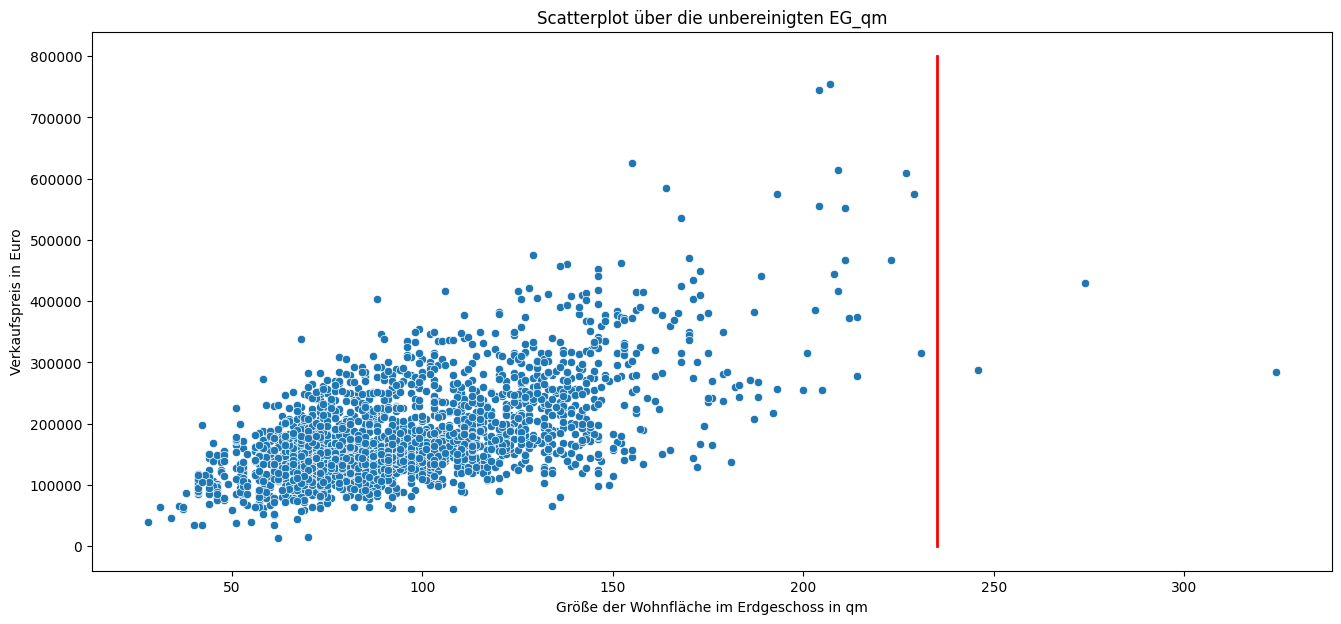

In [336]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="EG_qm", y="Z_Verkaufspreis")
plt.plot([235, 235], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten EG_qm")
plt.xlabel("Größe der Wohnfläche im Erdgeschoss in qm")
plt.ylabel("Verkaufspreis in Euro")

In [337]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["EG_qm"] <= 235]
df_train_cleaned.loc[:, "EG_qm"].unique()

array([125, 170, 119,  64, 103,  89,  75,  70,  80,  97, 120,  91,  78,
       128, 117,  87,  62,  69, 115,  88,  68,  77,  94, 110, 106,  83,
       142,  90, 104,  82, 143,  63,  73, 189, 145, 109,  84, 122,  67,
       130,  99,  74,  81,  58, 155, 121,  66, 161,  44,  48,  57,  61,
        98, 131,  92,  85, 173,  93, 127, 154, 100, 108, 141,  60,  53,
        76, 126,  71, 102, 116, 111, 211, 175, 135, 164, 137, 124, 133,
        45,  72,  86, 193,  65, 118, 146,  96,  46, 140,  51,  79, 214,
       113, 151, 156, 138, 139, 129,  95, 107, 134, 101, 112, 132,  31,
       168, 201, 205, 114,  37, 152, 147, 149,  54,  59, 153, 212, 123,
        41, 179, 105, 158, 229, 165,  56,  47, 167, 223, 186,  34, 136,
        52,  36, 181, 144, 209, 163, 171, 150, 148, 207, 172, 203, 157,
        49, 187, 204,  50, 227, 200, 159, 192, 188,  43,  28,  42, 166,
       174, 183, 180, 176, 208,  38, 231,  55, 162], dtype=int64)

#### Garage_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe der Garage gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

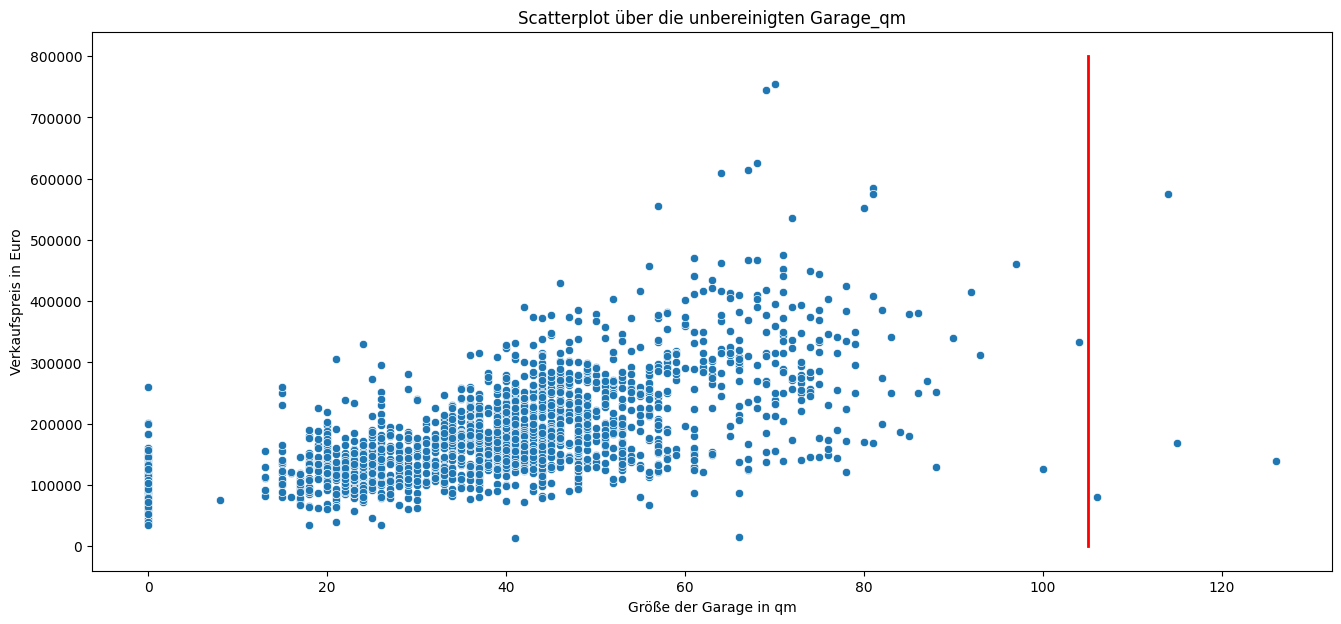

In [338]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Garage_qm", y="Z_Verkaufspreis")
plt.plot([105, 105], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Garage_qm")
plt.xlabel("Größe der Garage in qm")
plt.ylabel("Verkaufspreis in Euro")

In [339]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Garage_qm"] <= 105]
df_train_cleaned.loc[:, "Garage_qm"].unique()

array([ 49,  79,  40,  39,  27,  26,  53,  38,  24,  47,  41,  29,  33,
        42,  23,  32,   0,  34,  55,  44,  66,  19,  68,  54,  50,  72,
        28,  61,  22,  20,  52,  63,  37,  30,  43,  48,  25,  46,  18,
        31,  73,  21,  74,  57,  17,  15,  65,  51,  67,  69,  81,  71,
        35,  13,  70,  56,  78,  88,  45,  75,  36,  77,  58,  62,  64,
        90,  82,  59,  97,  86,  76,  80,   8,  60,  83,  16,  85,  92,
        93,  87, 104,  84], dtype=int64)

#### Keller_Typ_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe des Kellertyps (Keller_Typ_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

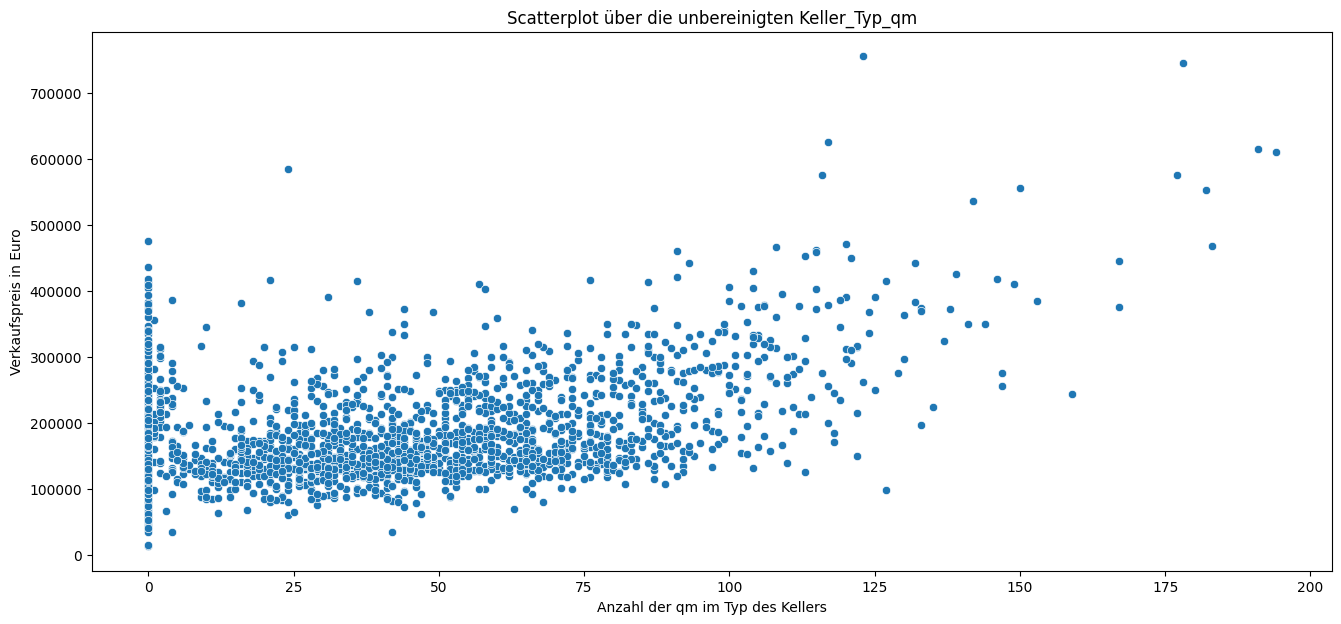

In [340]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Keller_Typ_qm", y="Z_Verkaufspreis")
#plt.plot([160, 160], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Keller_Typ_qm")
plt.xlabel("Anzahl der qm im Typ des Kellers")
plt.ylabel("Verkaufspreis in Euro")

#### Keller_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe des Kellers (Keller_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

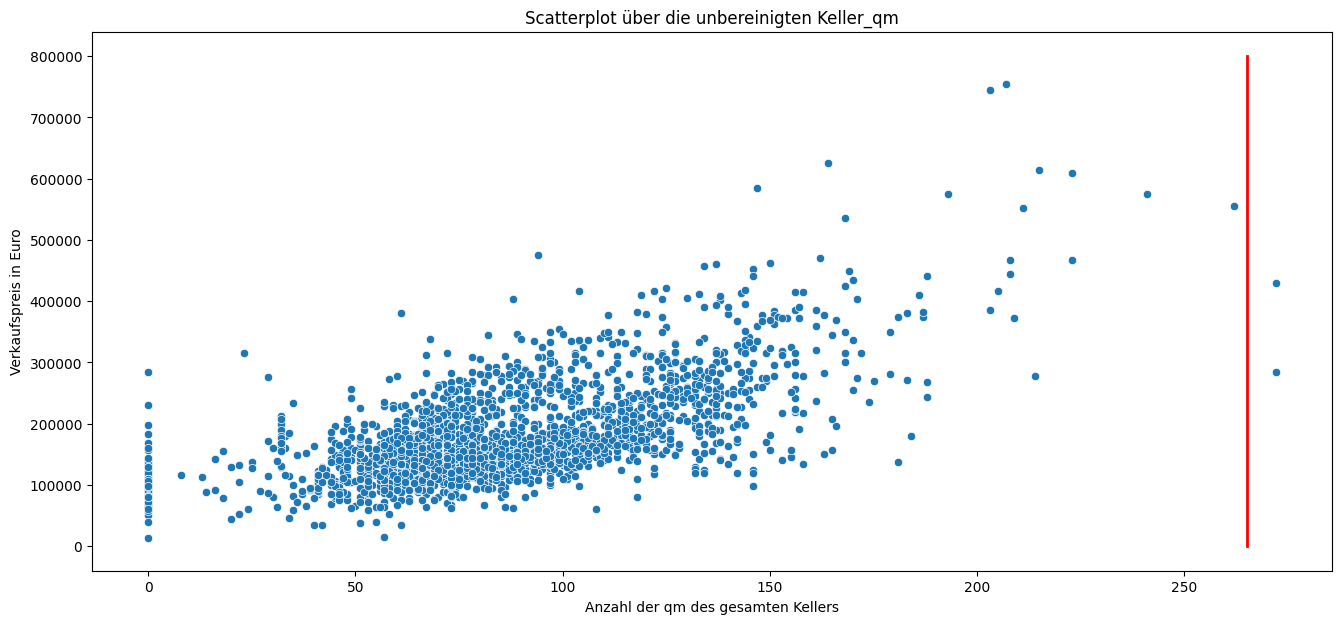

In [341]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Keller_qm", y="Z_Verkaufspreis")
plt.plot([265, 265], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Keller_qm")
plt.xlabel("Anzahl der qm des gesamten Kellers")
plt.ylabel("Verkaufspreis in Euro")

In [342]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Keller_qm"] <= 265]
df_train_cleaned.loc[:, "Keller_qm"].unique()

array([116, 168, 119,  64, 103,  89,  75,  70,  78,  97,  56,  92,  76,
         0,  61,  41,  53, 115,  91,  80,  90,  68,  79,  94, 110,  82,
        69,  88, 129,  77, 133,  51,  73, 188, 145, 122,  57, 100, 125,
        99,  95,  58, 158,  67, 106,  32,  66,  60,  44,  81,  48,  54,
        83, 124,  72, 123,  74,  85, 120, 169,  93, 127, 154, 108,  84,
        35, 143, 102,  59,  98, 140, 111, 208, 118, 172, 135, 147, 137,
        62, 155,  18,  40, 139,  86, 126,  22, 144,  13,  96,  45, 146,
       113,  46, 132, 214,  71, 105, 151, 156, 138, 134,  29, 149,  33,
        87, 101, 130,  16, 142, 104, 109,  65,  49,  63,  20, 121, 112,
       107, 153, 114,  24,  36,  42,  47, 209, 179,  52, 136, 241,  30,
       165,  55, 223, 183, 128,  34,  39, 162,  50, 181,  25, 205, 157,
        43, 117,  37, 163, 171, 211, 150,  27, 148,   8, 207, 152,  38,
       203, 161, 186, 187, 141,  31, 262, 170, 215, 164, 174, 166, 184,
        14, 175, 131,  23], dtype=int64)

#### OG_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe des Geschosses oberhalb des EG (OG_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

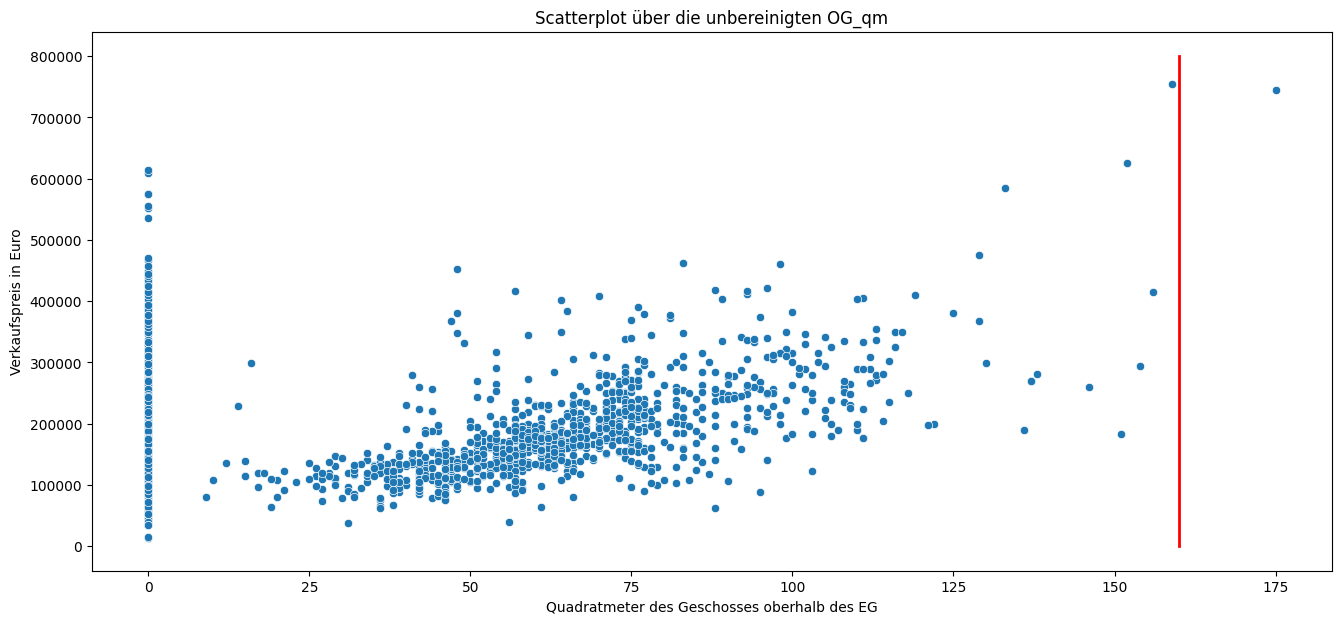

In [343]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="OG_qm", y="Z_Verkaufspreis")
plt.plot([160, 160], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten OG_qm")
plt.xlabel("Quadratmeter des Geschosses oberhalb des EG")
plt.ylabel("Verkaufspreis in Euro")

In [344]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["OG_qm"] <= 160]
df_train_cleaned.loc[:, "OG_qm"].unique()

array([  0,  73,  72,  65,  77,  52,  58,  75,  79,  83,  74, 119,  59,
        62,  31,  49,  71,  42,  96,  47,  48,  70,  63,  91,  39,  44,
        64,  54, 154, 100, 108,  61,  53,  87,  45,  29,  88, 133,  80,
        78,  35,  57,  51,  67,  69,  56,  76,  43,  68,  82,  25,  46,
        66,  50, 156,  26,  85,  86, 103, 110,  89, 105,  36, 113,  99,
        60,  55,  38,  84,  97,  81,  93, 106,  41, 111,  98, 136,  90,
       125, 137, 109,  17,  92,  28,  27, 138, 102,  32,  94,  37,  33,
        40, 159, 112, 116,  14,  95, 118, 104, 115, 130,  34,  19, 146,
        12,  10,  18,  15,  30, 129, 152,  23, 122, 117,  20,   9, 114,
        21, 151, 121, 107, 101], dtype=int64)

#### Wohnflaeche_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe der gesamten Wohnfläche (Wohnflaeche_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

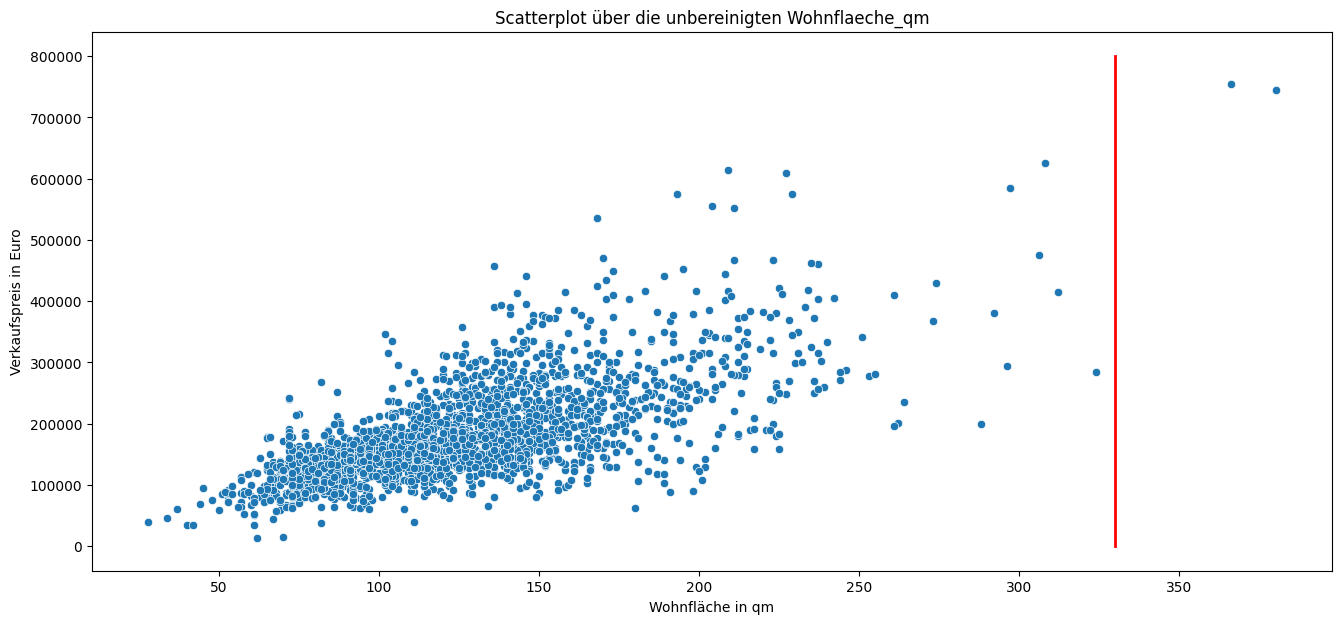

In [345]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Wohnflaeche_qm", y="Z_Verkaufspreis")
plt.plot([330, 330], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Wohnflaeche_qm")
plt.xlabel("Wohnfläche in qm")
plt.ylabel("Verkaufspreis in Euro")

In [346]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Wohnflaeche_qm"] <= 330]
df_train_cleaned.loc[:, "Wohnflaeche_qm"].unique()

array([125, 170, 119, 138, 103,  89,  75, 142, 145,  97, 198,  91,  78,
       128, 117, 140, 121,  69, 115,  80,  88, 141, 152, 166, 177, 110,
       157, 143, 261,  90, 181,  77,  63,  73, 189, 133, 149, 122, 225,
       227,  99, 106, 154, 123, 155, 136, 118, 131, 253,  82, 146, 109,
        94,  44,  81,  93, 111, 120, 296,  67,  98, 231,  92,  83, 139,
       191, 173, 151, 127, 186, 100, 108,  60,  76, 126, 169, 190, 211,
       102, 162, 220, 175, 135, 297,  74, 171, 203, 112, 104, 156, 137,
       159, 116,  45,  72, 150,  86, 165,  87,  96,  84, 194, 214, 113,
       124, 216, 312, 129, 172, 192, 158, 153, 212, 134, 101, 206, 130,
       217, 147, 107, 208, 144,  79, 132,  65, 204, 174, 193, 168, 160,
       201,  95,  61,  71, 180,  68, 205, 114,  37,  57, 223, 163, 235,
        53, 242, 179, 221, 262, 251, 105,  70, 229, 178, 187, 237, 292,
        85,  51, 219,  34, 236, 207, 183, 148, 213, 185, 234, 244, 255,
       164, 161, 209, 184,  64,  62,  48, 224, 202, 196, 226, 20

#### Kellerhoehe
Es existieren nur zwei "Sehr schlecht" Werte. Diese werden entfernt.

In [347]:
# Delete entries with very poor basement height and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Kellerhoehe"] != 1]
df_train_cleaned.loc[:, "Kellerhoehe"].unique()

array([4, 3, 0, 5, 2], dtype=int64)

#### Baujahr, Gesamteindruck, Umgebaut, Verkaufsjahr, Verkaufsmonat, Z_Verkaufspreis
Die verbleibenden Spalten weisen keine Ausreißer, unzulässige Werte oder sonstige Auffälligkeiten auf. Daher sind keine Bereinigungen erforderlich.

#### Multivariater Ausreißer: Umbau vor dem Baujahr des Hauses
Es sollten Datensätze entfernt werden, bei denen Immobilien früher umgebaut wurden, als ihr Baujahr. Davon gibt es genau einen.

In [348]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["Umgebaut"] < df_train_cleaned["Baujahr"])
display(df_train_cleaned[rule].loc[:, ["Umgebaut", "Baujahr"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,Umgebaut,Baujahr
655,2013,2014


#### Multivariater Ausreißer: Hohe Ausbaustufe ohne Obergeschoss-Quadratmeterangabe
Es sollten Datensätze entfernt werden, bei denen die Ausbaustufe größer als 1 ist (Obergeschosse vorhanden) aber der Wert bei OG_qm gleich 0 ist. Davon gibt es 29 Stück.

In [349]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["Ausbaustufe"] > 1) & (df_train_cleaned["OG_qm"] == 0)
display(df_train_cleaned[rule].loc[:, ["Ausbaustufe", "OG_qm"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,Ausbaustufe,OG_qm
113,2,0
256,2,0
333,2,0
342,2,0
371,2,0
548,2,0
695,2,0
768,2,0
820,2,0
836,2,0


#### Multivariater Ausreißer: Mehr Garagen als Zimmer
Es sollten Datensätze entfernt werden, bei denen die Anzahl der Garagen die Anzahl an Zimmern um den doppelten Wert übersteigt. Davon gibt es genau 2.

In [350]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["AnzahlZimmer"] * 2 < df_train_cleaned["Garagen"])
display(df_train_cleaned[rule].loc[:, ["AnzahlZimmer", "Garagen"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,AnzahlZimmer,Garagen
1564,1,3
2266,1,3


#### Multivariater Ausreißer: Mehr Bäder/Toiletten im Keller als in den Obergeschossen
Es sollten Datensätze entfernt werden, bei denen die Anzahl der Bäder im Keller höher ist als in den Obergeschossen. Davon gibt es genau 3.

In [351]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["Baeder"] < df_train_cleaned["BaederKG"])
display(df_train_cleaned[rule].loc[:, ["Baeder", "BaederKG"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,Baeder,BaederKG
557,1,2
2222,1,2
2278,1,2


### Korrelationsmatrix nach Abgeschlossener Data Preparation
Anhand der Korrelationsmatrix aus Aufgabe 2 soll abschließend untersucht werden, wie sich die Data Prepatation Schritte auf die Qualität der Korrelation zwischen Attributen und Verkaufspreis ausgewirkt haben.

Text(0.5, 1.0, 'Korrelations Heatmap mit allen Features')

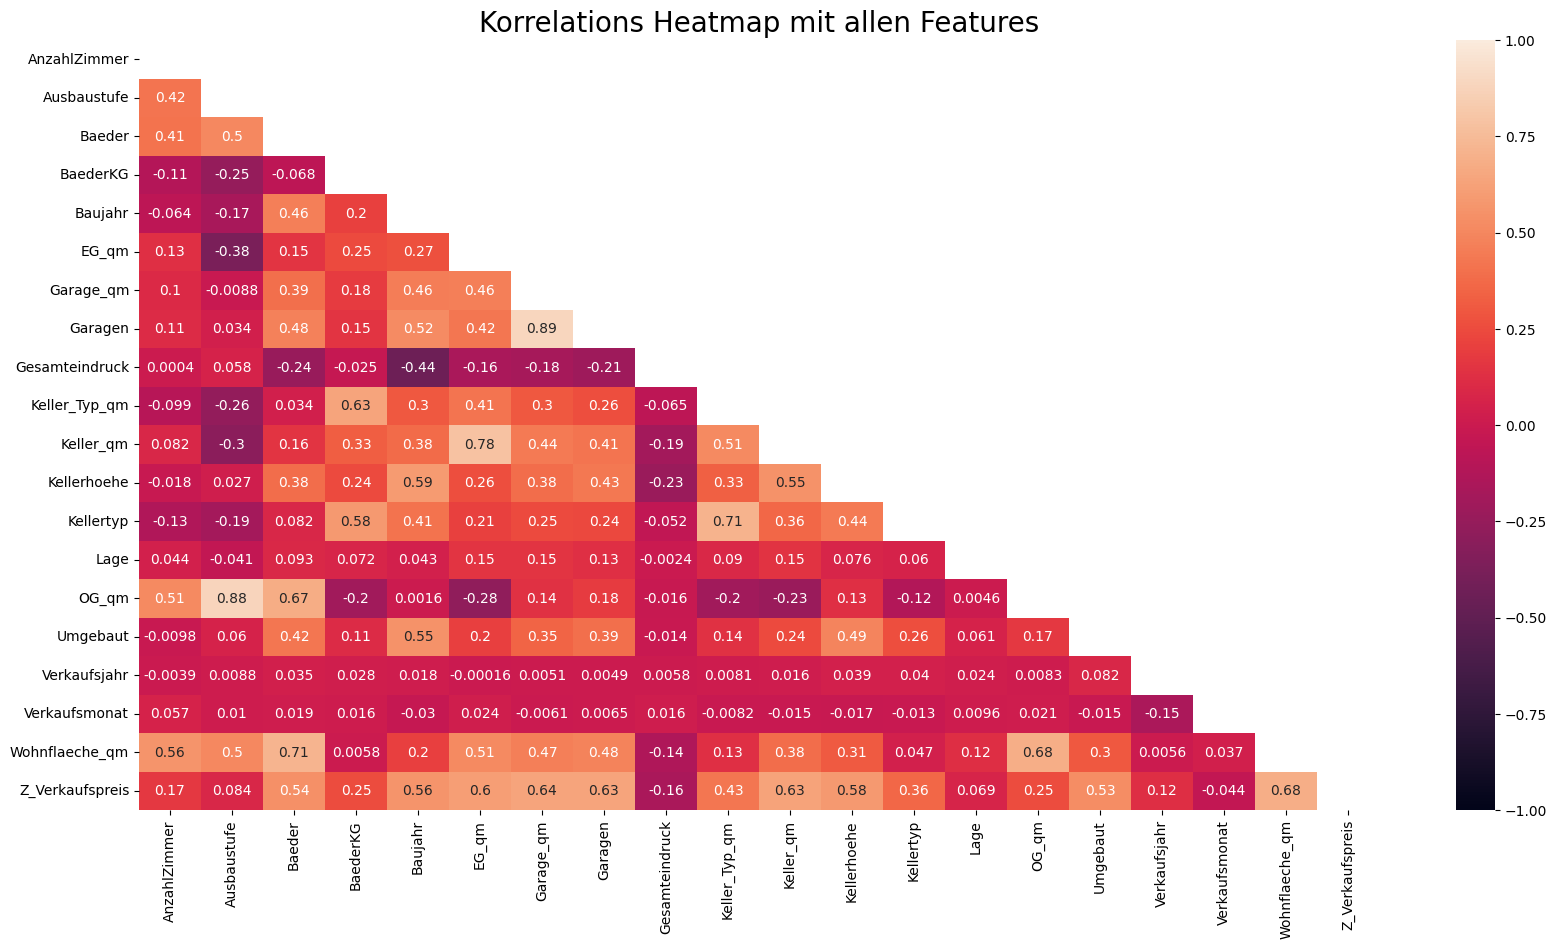

In [352]:
# Draw a correlation matrix heatmap and mask out the upper triangle
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_train_cleaned.iloc[:, 0:20].corr(), dtype=bool))
heatmap = sns.heatmap(df_train_cleaned.iloc[:, 0:20].corr(), mask=mask, vmin=-1, vmax=1, annot=True)
plt.title('Korrelations Heatmap mit allen Features', fontdict={'fontsize': 20})

- Durch das Encoding der kategorischen Daten kamen neue Features mit einer hohen Korrelation zum Verkaufspreis hinzu (z.B. Kellerhoehe).
- Durch die Ausreißererkennung und Datenbereinigung konnten die Korrelationen einiger bestehender Features mit dem Verkaufspreis gesteigert werden.

## 5. Modeling und Evaluation (6 Punkte)

**Aufgabenstellung**: _Vergleichen und optimieren Sie ein oder
mehrere weitere Verfahren zur Vorhersage des Verkaufspreises. Gehen Sie vor wie
in der Vorlesung gelehrt mit Trainings- und Validierungsdaten (80-20). Optimieren
Sie Ihre Vorhersage wenn sinnvoll.<br>
Geben Sie für den Trainings- und Validierungsdatensatz die Zielwerte R2, MSE,
RMSE, MAPE, MAX aus. Dokumentieren Sie dies auch.<br>
Interpretieren Sie das Ergebnis und den Einfluss der Features (falls möglich).
Untersuchen Sie Varianz und Verzerrung in der Vorhersage.<br>
Schreiben Sie in die ``data_for_test.csv`` die auf Basis Ihres besten Modells
vorhergesagt Werte in eine neue Spalte und geben Sie diese Datei mit ab. (Hinweis:
Sortieren Sie nicht um)._

### Splitten des Datensatzes in Trainings- und Validierungsdaten
Die gelabelten Daten (`data_for_training.csv`) werden im Verhältnis 80:20 in Trainings- und Validierungsdaten aufgeteilt.
- **Training:** Daten zum Lernen der Muster und Zusammenhänge für die Erzeugung der Modelle
- **Validierung:** Messung des Fehlers der Modellkandidaten und Auswahl des besten Modells
- **Test:** Überprüfung der Qualität des gewählten Modells am Ende

Die Parameterauswahl erfolgt anhand der Ergebnisse aus den Aufgaben 3 und 4. Es werden folgende Attribute für die Vorhersage des Verkaufspreises gewählt:<br>
`"Baeder", "Baujahr", "EG_qm", "Garage_qm", "Garagen", "Keller_qm", "Kellerhoehe", "Umgebaut", "Wohnflaeche_qm"`

In [353]:
from sklearn.model_selection import train_test_split

# Select parameters
selected_columns = ["Baeder", "Baujahr", "EG_qm", "Garage_qm", "Garagen", "Keller_qm", "Kellerhoehe", "Umgebaut", "Wohnflaeche_qm", "Z_Verkaufspreis"]
df_train_selected_features = df_train_cleaned.loc[:, selected_columns]

# Split the data in input features (X) and target values (Y)
X = df_train_selected_features.drop(columns=["Z_Verkaufspreis"])
Y = df_train_selected_features["Z_Verkaufspreis"]

# Split data set into training and validation data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Vergleich von Verfahren zur Vorhersage des Verkaufspreises
Nun werden verschiedene Verfahren zur Vorhersage des Verkaufspreises verglichen. Das Verfahren mit der besten Vorhersage wird dann weiter optimiert und auf die Testdaten (`data_for_test.csv`) angewendet. Diese Verfahren werden im folgenden angewendet und verglichen:
- Random Forest
- Extra Trees
- Gradient Boosting
- Linear Support Vector Regressor
- Passive Aggressive Regression

Für alle Verfahren werden auch die zugehörigen Fehlermetriken berechnet. Mit Hilfe von Fehlermetriken ist es möglich, die Güte eines Modells zu quantifizieren. Durch sie ist es möglich, die Eignung von Modellen für bestimmte Aufgaben objektiv zu bewerten. Dazu werden die folgenden Fehlermetriken herangezogen:
- **Coefficient of determination (R2):** R2 ist der Prozentsatz der Streuung in der Antwortvariablen. Also ein statistisches Maß dafür, wie dicht die Daten an der angepassten Regressionslinie liegen.
    - *Je höher das R-Quadrat, desto besser ist das Modell an die Daten angepasst.*
- **Mean Squared Error (MSE):** Der MSE bewertet die Qualität des Prognosemodells oder Prädiktors. Er beinhaltet sowohl die Varianz (die Streuung der vorhergesagten Werte zueinander) als auch die Verzerrung (der Abstand des vorhergesagten Wertes von seinem wahren Wert).
    - *Je näher an Null, desto besser*
- **Root Mean Squared Error (RMSE):** RMSE ist eine Erweiterung von MSE und ist definiert als die Quadratwurzel des mittleren quadratischen Fehlers. Der RMSE-Wert ist im Vergleich zum MSE in der gleichen Einheit wie der prognostizierte Wert.
    - *kleinere Werte sind besser*
- **Mean Absolute Percentage Error (MAPE):** Der MAPE ist der prozentuale Mittelwert der absoluten Differenz zwischen prognostizierten Werten und wahren Werten, geteilt durch den wahren Wert.
    - *kleinere Werte sind besser*
- **Max Error (MAX):** MAX berechnet den maximalen Restfehler, eine Metrik, die den größten Fehler zwischen dem vorhergesagten Wert und dem wahren Wert erfasst.
    - *kleinere Werte sind besser*

Die Wichtigkeit eines Merkmals (feature importance) wird als die normierte Gesamtreduktion des Kriteriums durch dieses Merkmal berechnet. Sie ist auch als Gini-Bedeutung bekannt. Je höher, desto wichtiger ist das Merkmal.

In [354]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, max_error

# Function to calculate and output the error metrics
def output_error_metrics(y_test, y_prediction):
    print(f"R2:\t{np.around(r2_score(y_test, y_prediction), decimals=4)}")
    print(f"MSE:\t{np.around(mean_squared_error(y_test, y_prediction), decimals=4)}")
    print(f"RMSE:\t{np.around(np.sqrt(mean_squared_error(y_test, y_prediction)), decimals=4)}")
    print(f"MAPE:\t{np.around(mean_absolute_percentage_error(y_test, y_prediction), decimals=4)}")
    print(f"MAX:\t{np.around(max_error(y_test, y_prediction), decimals=4)}")

# Function to output scatterplots with regression lines
def output_regression_scatterplots(y_prediction):
    fig, axes = plt.subplots(1, 9, figsize=(35, 5), sharey=True)
    axes[2].set_title("Calculated regression lines over the selected features")
    axes[0].set_ylabel("Predicted sales price")

    # Draw the individual scatterplots based on the selected attribute columns
    selected_columns_without_price = selected_columns[0:(len(selected_columns)-1)]
    for col in selected_columns_without_price:
        sns.regplot(x=col, y=y_prediction, data=x_train, ax=axes[selected_columns_without_price.index(col)], line_kws={"color":"k"})
    plt.show()

# Function for the execution of the various procedures
def perform_prediction_and_evaluate_results(regr, output_feature_importance = True):
    regr.fit(x_train, y_train)

    print("Evaluation on train data:")
    y_train_prediction = regr.predict(x_train)
    output_error_metrics(y_train, y_train_prediction)

    print("\nEvaluation on test data:")
    y_test_prediction = regr.predict(x_test)
    output_error_metrics(y_test, y_test_prediction)

    if output_feature_importance == True:
        print("\nFeature importances:")
        feature_names = regr.feature_names_in_
        feature_importances = regr.feature_importances_
        for i in range(regr.n_features_in_):
            if feature_names[i] == "Baeder" or feature_names[i] == "EG_qm":
                print(f"{feature_names[i]}:\t\t{feature_importances[i]}")
            else:
                print(f"{feature_names[i]}:\t{feature_importances[i]}")

    print("\nScatterplots with regression lines:")
    output_regression_scatterplots(y_train_prediction)

#### Random Forest Regression
Nun wird eine Random Forest Regression mit den zuvor reduzierten Attributen durchgeführt. Die Bewertung erfolgt anhand der vorgegebenen Fehlermetriken.

Evaluation on train data:
R2:	0.9705
MSE:	156746022.7447
RMSE:	12519.8252
MAPE:	0.0524
MAX:	86563.66

Evaluation on test data:
R2:	0.8264
MSE:	1137419140.3344
RMSE:	33725.6451
MAPE:	0.1293
MAX:	199179.15

Feature importances:
Baeder:		0.008127275508292712
Baujahr:	0.4125071601694066
EG_qm:		0.08482240583986823
Garage_qm:	0.15297495455083948
Garagen:	0.025866656094374343
Keller_qm:	0.09283413280584123
Kellerhoehe:	0.01891634221230738
Umgebaut:	0.03736106373229459
Wohnflaeche_qm:	0.16659000908677538

Scatterplots with regression lines:


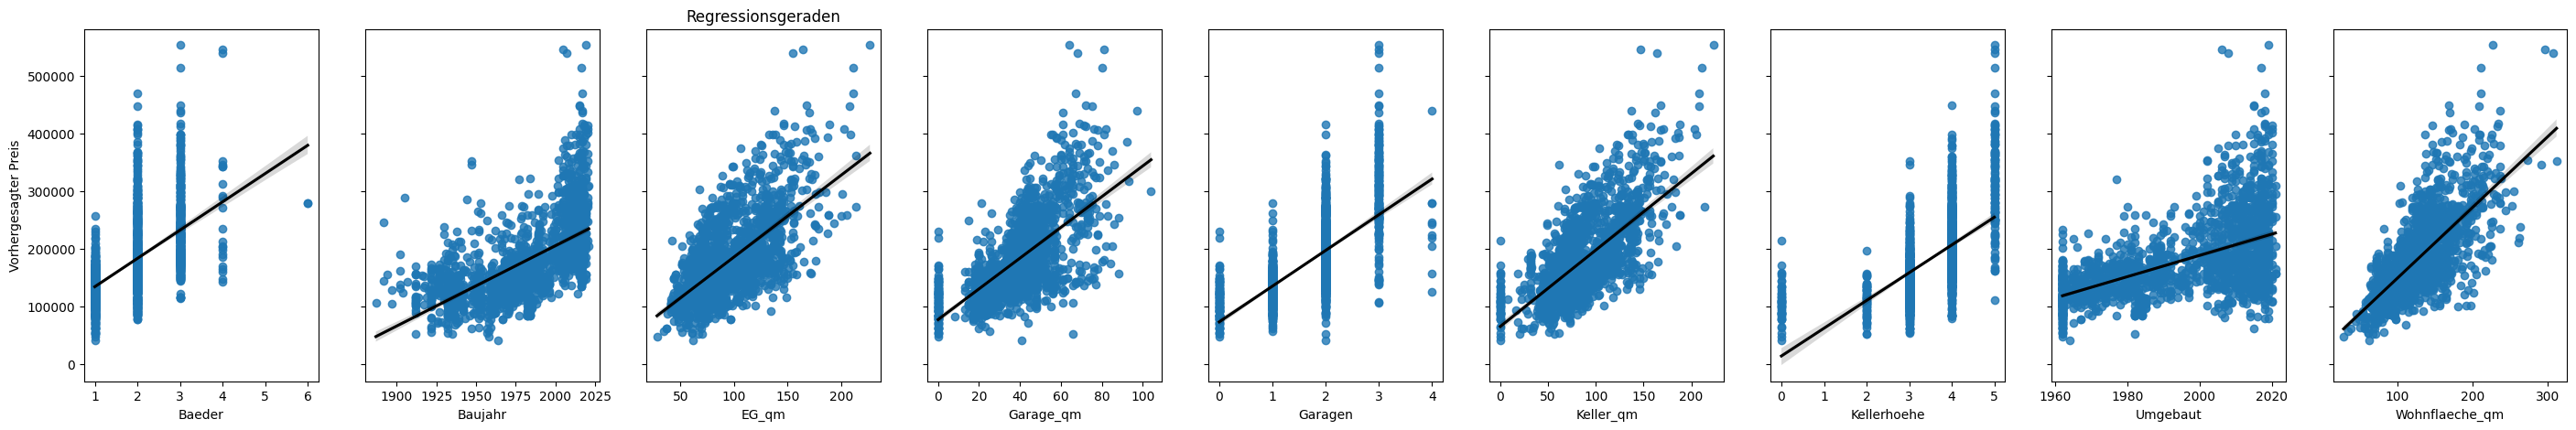

In [355]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=100)
perform_prediction_and_evaluate_results(randomForest)

#### Extra Trees Regression
Nun wird eine Extra Trees Regression mit den zuvor reduzierten Attributen durchgeführt. Die Bewertung erfolgt anhand der vorgegebenen Fehlermetriken.

Evaluation on train data:
R2:	0.9983
MSE:	8994739.7707
RMSE:	2999.1232
MAPE:	0.0028
MAX:	67796.2

Evaluation on test data:
R2:	0.8338
MSE:	1089082996.4962
RMSE:	33001.2575
MAPE:	0.1314
MAX:	155198.11

Feature importances:
Baeder:		0.04998636935031497
Baujahr:	0.11680966962263978
EG_qm:		0.08287579417210589
Garage_qm:	0.08142062173415479
Garagen:	0.1762457143502317
Keller_qm:	0.10308720649760486
Kellerhoehe:	0.1332958522977558
Umgebaut:	0.09304718396712731
Wohnflaeche_qm:	0.16323158800806487

Scatterplots with regression lines:


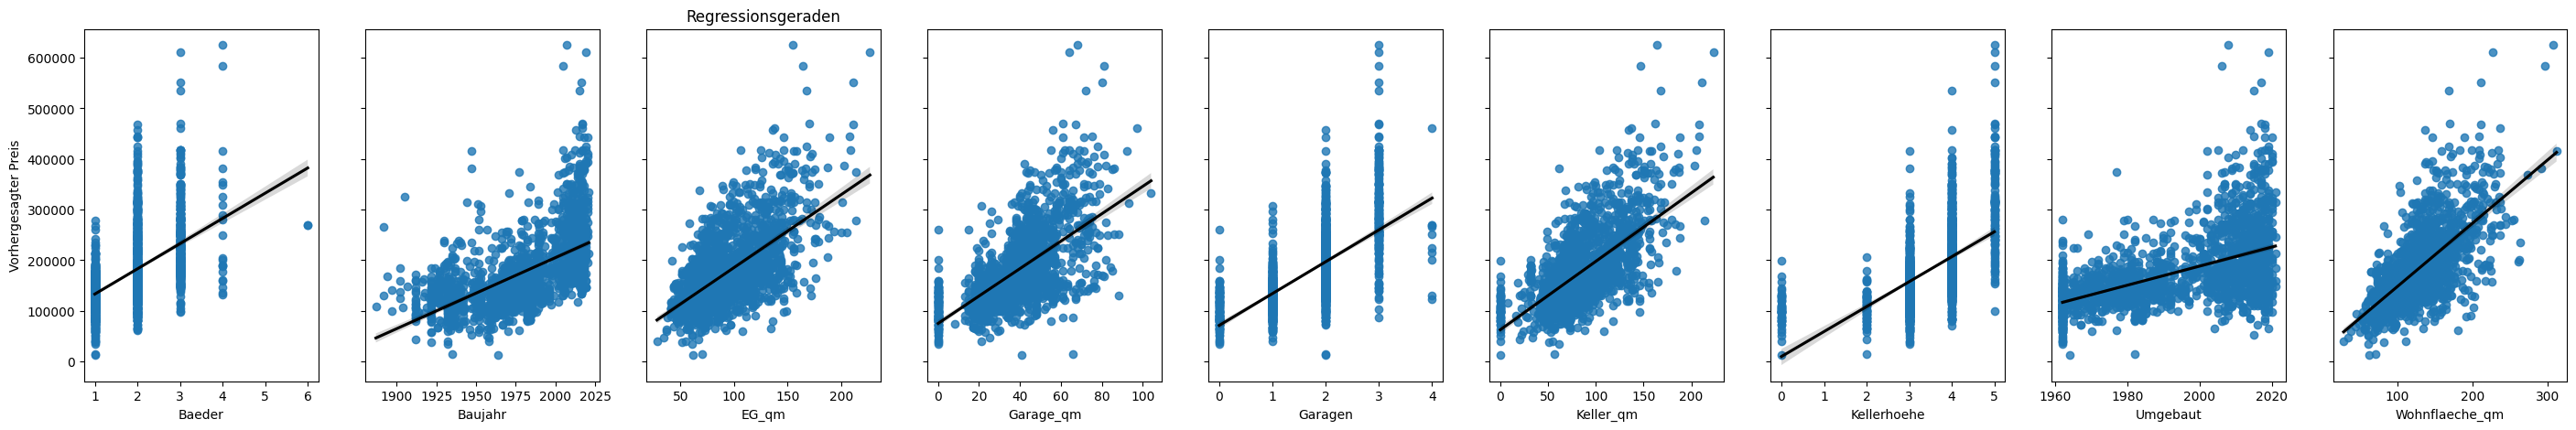

In [356]:
from sklearn.ensemble import ExtraTreesRegressor

extraTrees = ExtraTreesRegressor(n_estimators=100)
perform_prediction_and_evaluate_results(extraTrees)

#### Gradient Boosting Regression
Nun wird eine Gradient Boosting Regression mit den zuvor reduzierten Attributen durchgeführt. Die Bewertung erfolgt anhand der vorgegebenen Fehlermetriken.

Evaluation on train data:
R2:	0.8726
MSE:	677448317.538
RMSE:	26027.8374
MAPE:	0.1132
MAX:	185685.6254

Evaluation on test data:
R2:	0.8412
MSE:	1040589285.0164
RMSE:	32258.1662
MAPE:	0.1279
MAX:	154736.0448

Feature importances:
Baeder:		0.03460412511509669
Baujahr:	0.33018611754261323
EG_qm:		0.06365413221634489
Garage_qm:	0.11758469633693765
Garagen:	0.027091939419998264
Keller_qm:	0.1538054848631684
Kellerhoehe:	0.04137758277456072
Umgebaut:	0.04065008670118819
Wohnflaeche_qm:	0.19104583503009195

Scatterplots with regression lines:


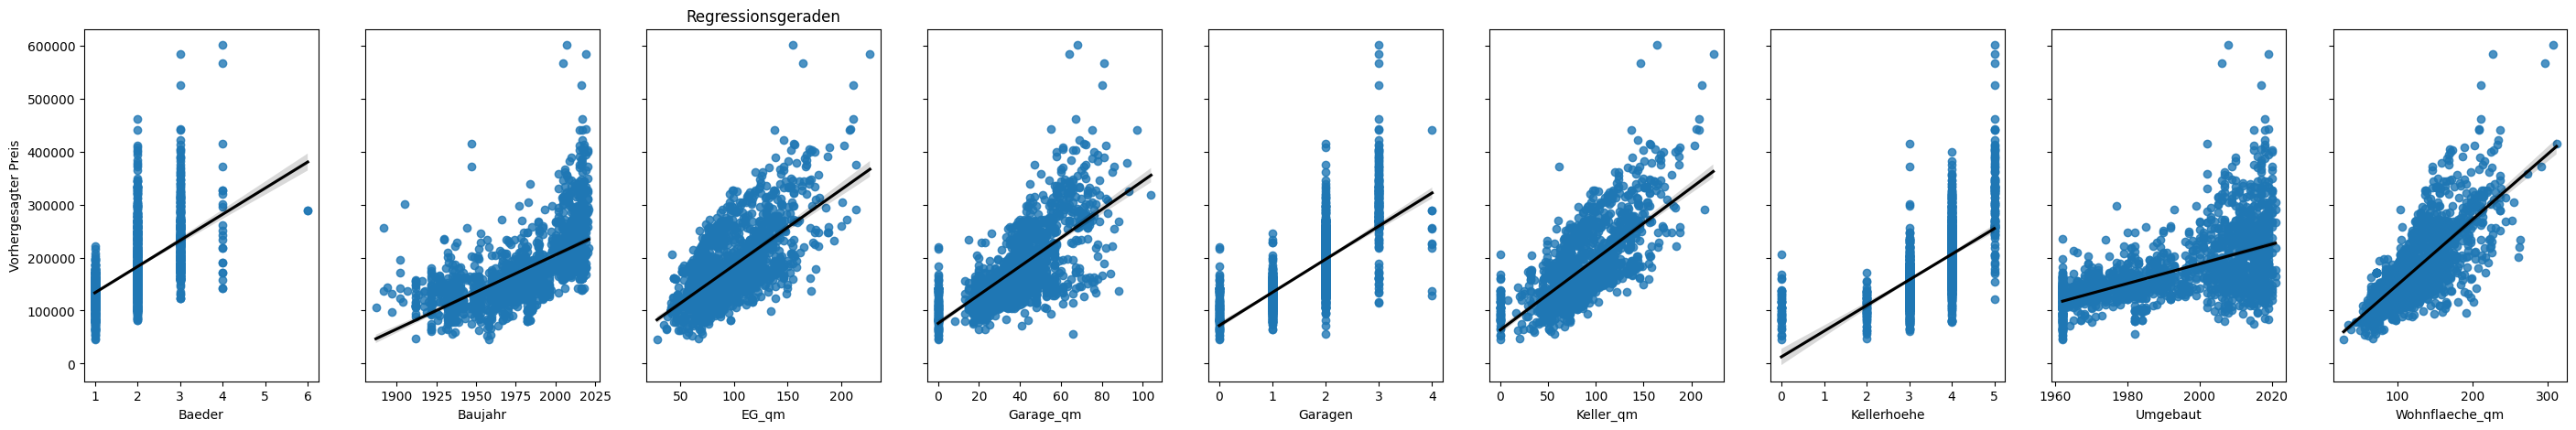

In [357]:
from sklearn.ensemble import GradientBoostingRegressor

gradientBoosting = GradientBoostingRegressor(n_estimators=100)
perform_prediction_and_evaluate_results(gradientBoosting)

#### Epsilon-Support Vector Regression
Nun wird eine Epsilon-Support Vector Regression mit den zuvor reduzierten Attributen durchgeführt. Die Bewertung erfolgt anhand der vorgegebenen Fehlermetriken.

Evaluation on train data:
R2:	0.7373
MSE:	1396938207.9937
RMSE:	37375.6366
MAPE:	0.147
MAX:	249567.4897

Evaluation on test data:
R2:	0.7429
MSE:	1684306133.2572
RMSE:	41040.2989
MAPE:	0.1391
MAX:	197467.6575

Scatterplots with regression lines:


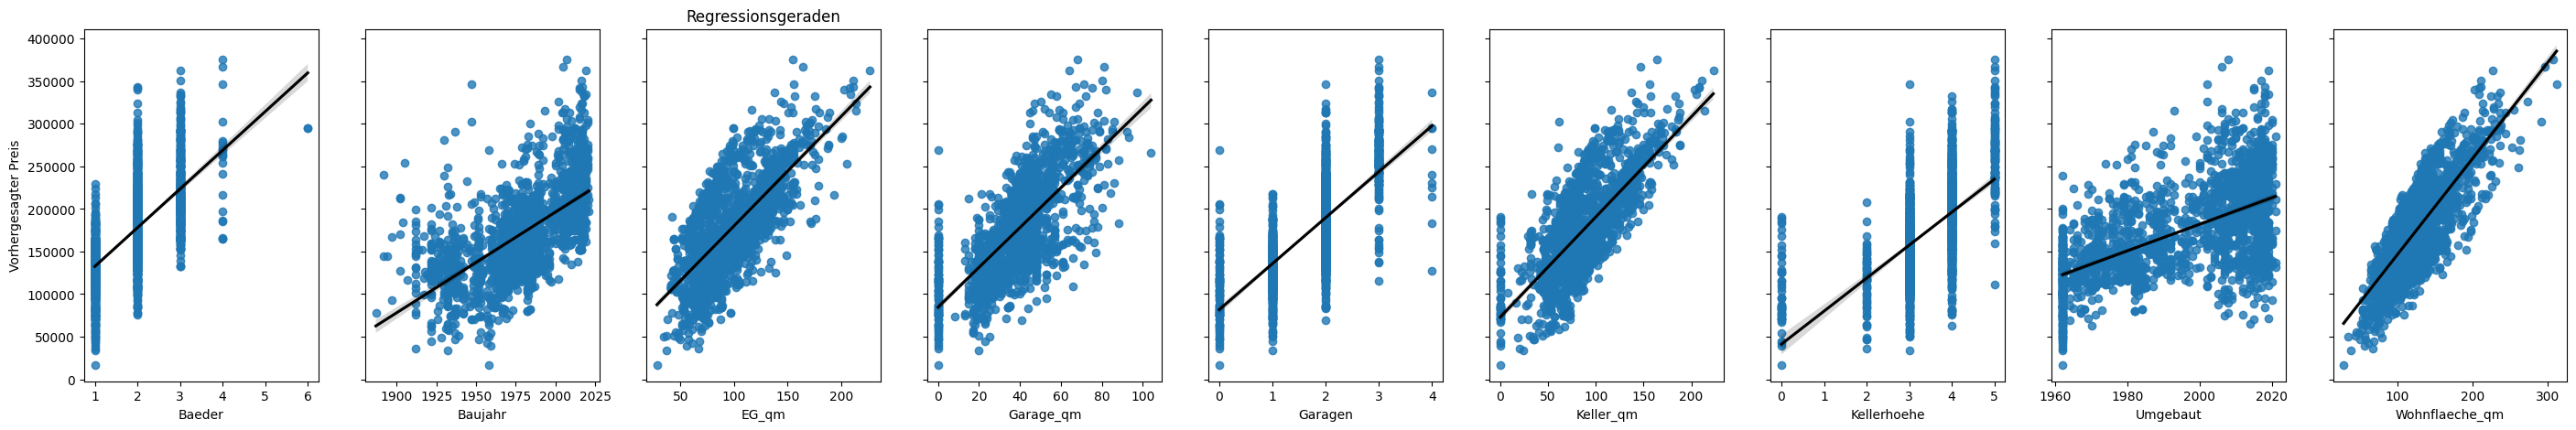

In [358]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
perform_prediction_and_evaluate_results(svr, output_feature_importance = False)

#### Passive Aggressive Regression
Nun wird eine Passive Aggressive Regressor Regression mit den zuvor reduzierten Attributen durchgeführt. Die Bewertung erfolgt anhand der vorgegebenen Fehlermetriken.

Evaluation on train data:
R2:	0.5496
MSE:	2395313018.2967
RMSE:	48941.9352
MAPE:	0.209
MAX:	257582.3213

Evaluation on test data:
R2:	0.5696
MSE:	2819481970.6871
RMSE:	53098.7944
MAPE:	0.1981
MAX:	194876.3054

Scatterplots with regression lines:


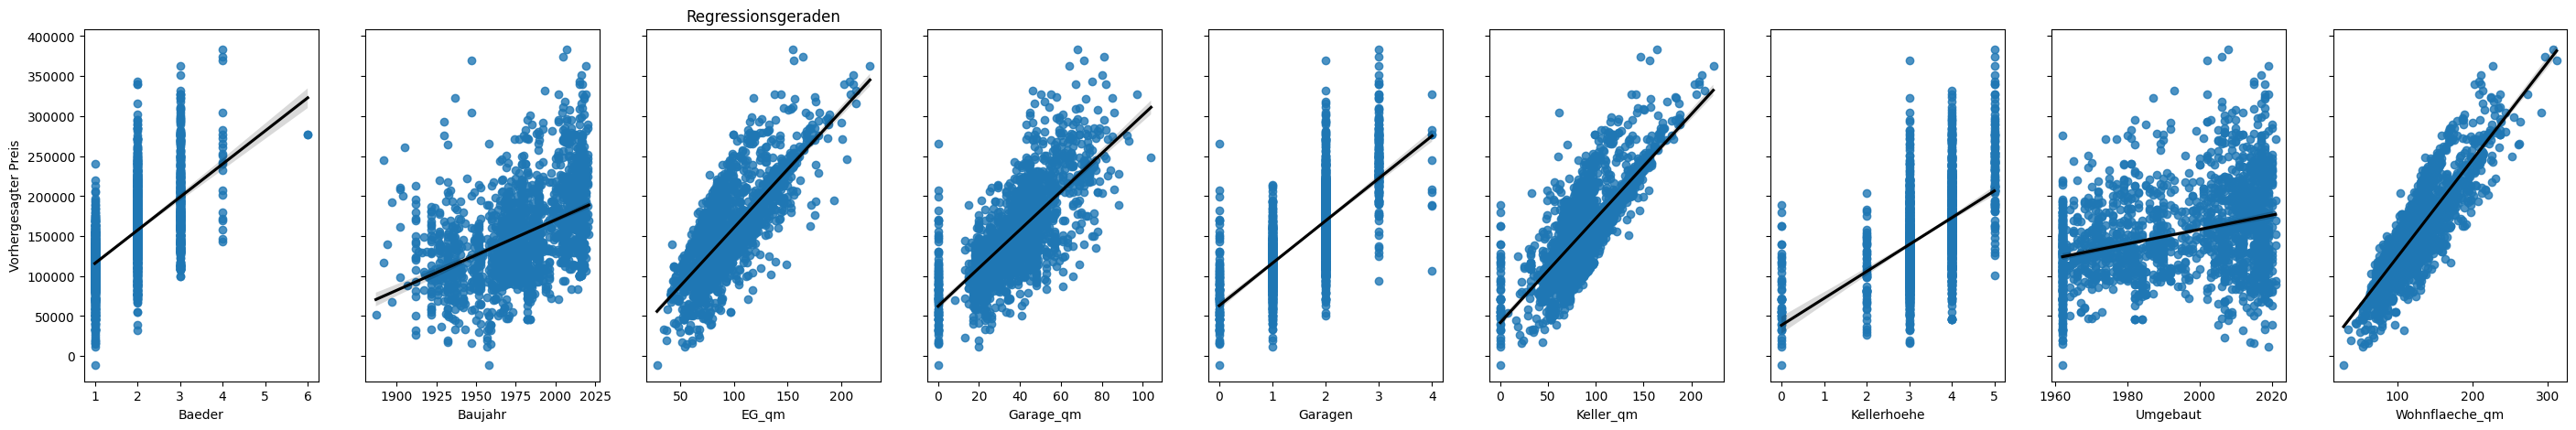

In [359]:
from sklearn.linear_model import PassiveAggressiveRegressor

passiveAgressive = PassiveAggressiveRegressor()
perform_prediction_and_evaluate_results(passiveAgressive, output_feature_importance = False)

### Hyperparameteroptimierung für die beste Vorhersage-Methode
In unserem Fall hat sich die **Gradient Boosting Regression** als geeignetste Methode für die Vorhersage des Verkaufspreises herausgestellt. Um die Vorhersage weiter zu optimieren, wird nun eine Hyperparameteroptimierung durchgeführt. Dafür stellt sklearn die Methode `GridSearchCV` bereit.<br>

Da die Hyperparameteroptimierung über die Funktion GridSearchCV eine rechen- und zeitintensive Operation ist, ist sie im Notebook standardmäßig deaktiviert. Der durchschnittliche Score beträgt **0,82**.

In [360]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Activate/Deactivate GridSearch function
gridSearch_active = True

# Calculate optimal hyperparameters
if gridSearch_active == True:
    gradientBoosting = GradientBoostingRegressor()

    grid_search = GridSearchCV(gradientBoosting, {
        # Dictionary with parameter names as keys and lists of settings to try as values
        "learning_rate": [0.06, 0.065, 0.07, 0.075, 0.08],
        "max_depth": [3, 4, 5, 6],
        "min_samples_split": [2, 3, 4, 5],
        "n_estimators": [120, 125, 130, 135, 140]
    }, n_jobs=-1, verbose=1)

    grid_search.fit(X, Y)

    # Output results
    print("The best parameters are:")
    for key, value in grid_search.best_params_.items():
        print(f"  • {key}: {value}")
    print("The score is:", grid_search.best_score_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
The best parameters are:
  • learning_rate: 0.07
  • max_depth: 4
  • min_samples_split: 4
  • n_estimators: 140
The score is: 0.8185061331905633


Beispielausgabe:
```
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
The best parameters are:
  • learning_rate: 0.07
  • max_depth: 4
  • min_samples_split: 4
  • n_estimators: 135
The score is: 0.8182500816207258
```

### Trick 17
Nachdem die optimalen Hyperparameter berechnet wurden, wird das ausgewählte Modell abschließend mit dem kompletten Datensatz (Trainings- + Validierungsdaten) final trainiert. Dadurch werden die vorhandenen Informationen bestmöglich ausgenutzt. Die Vorhersagen des neuen Modells sind mindestens so gut, wie die des Vorherigen, können aber auch besser sein.

In [361]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the gradient boosting regressor with the selected hyperparameters
gradientBoosting_final = GradientBoostingRegressor(
    random_state=0,
    learning_rate=0.07,
    max_depth=4,
    min_samples_split=4,
    n_estimators=135
)

# Training the model
gradientBoosting_final.fit(X, Y)

GradientBoostingRegressor(learning_rate=0.07, max_depth=4, min_samples_split=4,
                          n_estimators=135, random_state=0)

### Vorhersagen berechnen und in `data_for_test_filled.csv` schreiben
Mit dem finalen Modell werden nun Verkaufspreise für den Testdatensatz vorhergesagt. Anschließend werden die Vorhersagen in das `data_for_test_filled.csv` File geschrieben.

In [362]:
# Select chosen parameters on the test data frame
selected_columns = ["Baeder", "Baujahr", "EG_qm", "Garage_qm", "Garagen", "Keller_qm", "Kellerhoehe", "Umgebaut", "Wohnflaeche_qm"]
df_test_selected_features = df_test.loc[:, selected_columns]

# Define mapping and apply labelencoding for the required columns in the test dataset
mapping = {"0": 0, "Sehr Schlecht": 1, "Schlecht": 2, "Durchschnitt": 3, "Gut": 4, "Sehr gut": 5}
df_test_selected_features["Kellerhoehe"] = df_test_selected_features["Kellerhoehe"].replace(mapping)

# Make predictions for the "data_for_test.csv" data with the trained model
y_predicted_final = gradientBoosting_final.predict(df_test_selected_features)

# Read data_for_test, add the predictions to the corresponding rows and save as a new CSV file
try:
    # Create new file and open test and test_filled
    data_for_test_filled = open("data_for_test_filled.csv", "x").close()
    data_for_test = open("data_for_test.csv", "r")
    data_for_test_filled = open("data_for_test_filled.csv", "a")

    # Loop through every row and append the prediction at the end of the line
    # The first line is a special case
    first_row = True
    count_rows = df_test_selected_features.shape[0]
    for row, i in zip(data_for_test, range(-1, count_rows)):
        if first_row == True:
            data_for_test_filled.write(row.removesuffix("\n") + ";" + "Z_Verkaufspreis" + "\n")
            first_row = False
        else:
            data_for_test_filled.write(row.removesuffix("\n") + ";" + str(int(np.round(y_predicted_final[i]))) + "\n")

    # Close both files
    data_for_test.close()
    data_for_test_filled.close()
    print("File data_for_test_filled.csv created successfully.")
except FileExistsError:
    print("The file data_for_test_filled.csv does already exist. No changes were made.")

The file data_for_test_filled.csv does already exist. No changes were made.
